In [1]:
import random
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# for animation
from matplotlib import animation
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from IPython.display import HTML

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

## Linear Regression

Tip: Equation of a line is $y = mx+c$

[0 1 2 3 4 5 6 7 8 9]
[10 13 16 19 22 25 28 31 34 37]


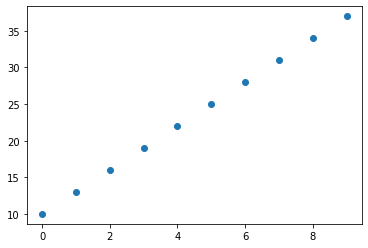

In [2]:
m = 3
c = 10
X = np.arange(0,10)
Y = m*X+c

print(X)
print(Y)

ax = plt.subplot()
ax.plot(X, Y, 'o');

In [3]:
m_guess = 0
c_guess = 0

epochs = 100
lr = 0.01    # learning rate

m_guess: 2.99269073703976
c_guess: 10.022306254739982


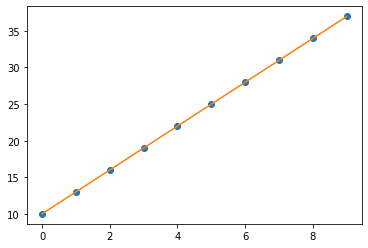

In [4]:
def find_values(X, Y, m_guess, c_guess):
    for _ in range(epochs):
        for x, y in zip(X, Y):
            y_guess = m_guess * x + c_guess                      # make a guess
            error = (y - y_guess)**2                             # compute error

            y_guess_with_delta_m = (m_guess+0.01) * x + c_guess  # make a guess with m+dm
            y_guess_with_delta_c = m_guess * x + (c_guess+0.01)  # make a guess with c+dc

            err_with_delta_m = (y - y_guess_with_delta_m)**2     # compute error with m+dm
            err_with_delta_c = (y - y_guess_with_delta_c)**2     # compute error with c+dc

            de_dm = (err_with_delta_m - error) / 0.01            # how much does new error rise with m+dm
            de_dc = (err_with_delta_c - error) / 0.01            # how much does new error rise with c+dc

            new_m = m_guess - (de_dm * lr)                       # make a new guess for m
            new_c = c_guess - (de_dc * lr)                       # make a new guess for c

            m_guess = new_m
            c_guess = new_c

    return m_guess, c_guess

m_guess, c_guess = find_values(X, Y, m_guess, c_guess)
print("m_guess:", m_guess)
print("c_guess:", c_guess)

ax = plt.subplot()
ax.plot(X, Y, 'o');
ax.plot(X, m_guess*X+c_guess);

## Logistic Regression

In [5]:
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 10), random_state=SEED)
print(X[:5])
print(y[:5])

[[3.26622695 9.32148409]
 [8.40299066 7.04038689]
 [3.20101846 9.61806565]
 [8.14199958 7.88337782]
 [7.54739935 7.2937276 ]]
[0 1 0 1 1]


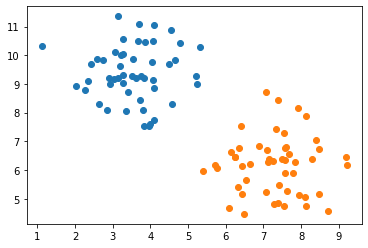

In [6]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'o')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'o')
plt.show()

In [7]:
class MyLogisticRegression() :
    def __init__(self, lr, iters) :        
        self.lr = lr        
        self.iters = iters
          
    # Function for model training    
    def fit(self, X, Y) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros(self.n)        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
        for i in range(self.iters) :            
            self.update_weights()
        
        return self.W, self.b
      
    # Helper function to update weights in gradient descent
    def update_weights(self) :           
        yp = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))
          
        # calculate gradients        
        err = yp - self.Y.T        
        err = np.reshape(err, self.m)        
        dW = np.dot(self.X.T, err) / self.m         
        db = np.sum(err) / self.m 
          
        # update weights    
        self.W = self.W - self.lr * dW    
        self.b = self.b - self.lr * db
    
    def predict( self, X ) :    
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))        
        Y = np.where(Z > 0.5, 1, 0) 
        return Y

In [8]:
def get_random_color():
    return random.choice(['black', 'red', 'blue', 'green', 'yellow', 'orange', 'cyan', 'purple'])

def get_decision_boundary(X, clfs, names):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = [clf.predict(np.c_[xx.ravel(), yy.ravel()]) for clf in clfs]

    fig = plt.figure()
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'o')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'o')

    Z = [z.reshape(xx.shape) for z in Z]
    for i, z in enumerate(Z):
        ctr = plt.contour(xx, yy, z, 1, colors=get_random_color())
        plt.clabel(ctr, inline=1, fontsize=10)
        ctr.collections[i].set_label(names[i])

    plt.legend(loc='lower left')
    plt.show()

In [9]:
# our implementation
my_clf = MyLogisticRegression(0.1, 10)
my_W, my_b = my_clf.fit(X, y)

# scikit implementation
clf = LogisticRegression()
clf.fit(X, y)
W, b = clf.coef_, clf.intercept_

print("Our implementation parameters:", (my_W, my_b))
print("Scikit implementation parameters:", (W, b))

Our implementation parameters: (array([ 0.55752376, -0.39136361]), 0.006623988816331296)
Scikit implementation parameters: (array([[ 1.8653136 , -1.29676196]]), array([-0.01865054]))


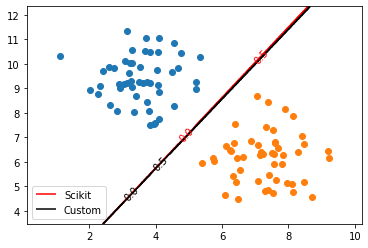

In [10]:
get_decision_boundary(X, [clf, my_clf], ['Scikit', 'Custom'])

## Neural Network

In [2]:
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=SEED)
print(X[:5])
print(y[:5])

[[ 1.58202308 -0.44581483]
 [ 0.0660451   0.4392075 ]
 [ 0.73663111 -0.39896339]
 [-1.05692838  0.2424558 ]
 [-0.80216162  0.20271838]]
[1 1 1 0 0]


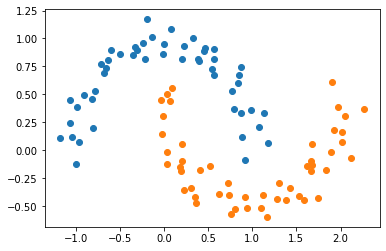

In [3]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'o')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'o')
plt.show()

In [18]:
def get_decision_contour(X, y, clf):    
    h = .02
    # X = StandardScaler().fit_transform(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    fig = plt.figure(1, figsize=(8, 6))
    ax = plt.subplot(111)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)    

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    cm = plt.cm.RdBu;
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

/Users/wjv316/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


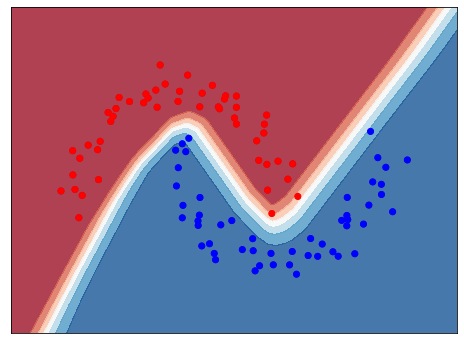

In [31]:
# clf = MLPClassifier(hidden_layer_sizes=(100,), solver='adam', max_iter=100, random_state=SEED)
clf = MLPClassifier(hidden_layer_sizes=(50, 50,), solver='adam', max_iter=400, random_state=SEED)
clf.fit(X, y)
get_decision_contour(X, y, clf)

### Training process animation

Supplementary code for generating pretty training videos

In [32]:
def make_video(X, y, clf, epochs=100):
    h = .02
    X = StandardScaler().fit_transform(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    clf.warm_start = True
    clf.max_iter = 1

    fig = plt.figure(1, figsize=(8, 6))
    ax = plt.subplot(111)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    def init():
        return fig,

    def animate(i):
        pbar.update(1)
        clf.fit(X, y)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        cm = plt.cm.RdBu;
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        return fig,

    # Animate
    pbar = tqdm.tqdm(total=epochs, position=0, leave=True)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=epochs, interval=20, blit=True)
    return anim

### Make circles

In [39]:
# X, y = datasets.make_circles(n_samples=100, noise=0.04, random_state=SEED)
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=SEED)
X, y = datasets.make_gaussian_quantiles(n_samples=100, n_features=2, n_classes=2, random_state=SEED)
print(X[:5])
print(y[:5])

[[ 1.40279431 -1.40185106]
 [-0.70205309 -0.32766215]
 [-1.15099358  0.37569802]
 [ 0.25988279  0.78182287]
 [-0.90802408 -1.4123037 ]]
[1 0 1 0 1]


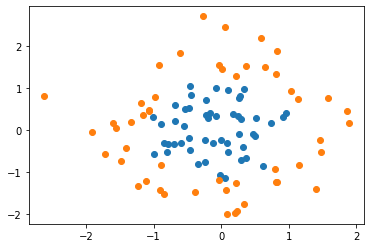

In [40]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'o')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'o')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]/Users/wjv316/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 100/100 [00:53<00:00,  1.09it/s]

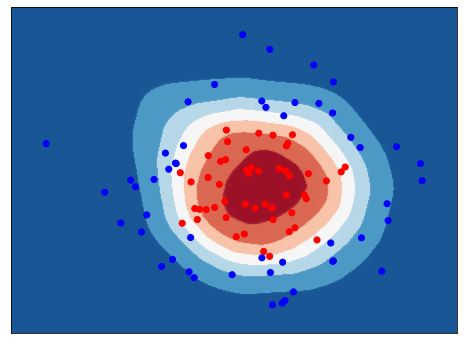

In [41]:
clf = MLPClassifier(hidden_layer_sizes=(50, 50,), solver='adam')
HTML(make_video(X, y, clf,epochs=100).to_jshtml())